In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import os
import datetime as dt
import numpy as np
from copy import deepcopy
from IPython.display import display

# Setup

In [2]:
font = {'family' : 'monospace',
        'weight' : 'normal',
        'size'   : 15}

mpl.rc('font', **font)
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams["axes.formatter.useoffset"] = False

# Load data

In [3]:
files = os.listdir("data")
# Sort dates
dates = [dt.datetime.strptime(re.findall(r'\d{4}-\d{2}-\d{2}',f)[0],'%Y-%m-%d') for f in files]
dates = sorted(dates,reverse=False)
dates = [i.strftime('%Y-%m-%d') for i in dates]

In [4]:
dfs_raw = {d: pd.read_csv(f'data/worldometers-{d}.tsv',sep="\t") for d in dates}

# Cleaning
* Replace nan values in numerical attributes with ```0```
* Replace nan values in categorical attributes with ```Other```

In [5]:
dfs = deepcopy(dfs_raw)
for df in dfs.values():
    for i in range(1, df.shape[1] - 1):
        df.iloc[:,i] = df.iloc[:,i].fillna(0)
    df.iloc[:,-1] = df.iloc[:,-1].fillna('Other')

# Analyzing
## Questions
### Observation on all days
1. What is the trend of NewCases?
2. What is the trend of NewDeaths?
3. What is the trend of NewRecovered?
4. What is the trend of Serious/Critical?
### Observation on 1 day
1. What is the distribution of cases per 1 million people?
2. What is the distribution of tests performed per 1 million people?
3. What is the distribution of total recovered cases?
4. What is the distribution of deaths cases?
5. What is the distribution of serious/critical cases?
6. What is the number of cases in each continent?
7. What is the number of deaths in each continent?
8. What is the number of serious/critical cases in each continent?
9. What is the number of recovered cases in each continent?
10. Does Population affect NewCases?
11. Does Population affect NewDeaths?
12. Does the number of test conducted affect the total cases?
13. Does the number of serious cases leads to high number of death cases? 

## Support fuctions

In [6]:
def draw_fig(data, xlabel, ylabel, title, figname,figtype, rotation='90'):
    plt.xticks(rotation=rotation)
    if figtype == 'plot':
        if len(data) > 2:
            for i in range(1, len(data)):
                plt.plot(data[0],data[i])
        plt.plot(data[0],data[1])
    elif figtype == 'hist':
        fig = plt.hist(data,bins=15)
        plt.xticks(fig[1])
    elif figtype == 'bar':
        plt.bar(data[0],data[1])
    elif figtype == 'scatter':
        plt.scatter(data[0], data[1])
    else: return None
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"figures/{figname}.png")

## Observation on collected days

### 1. New cases trend

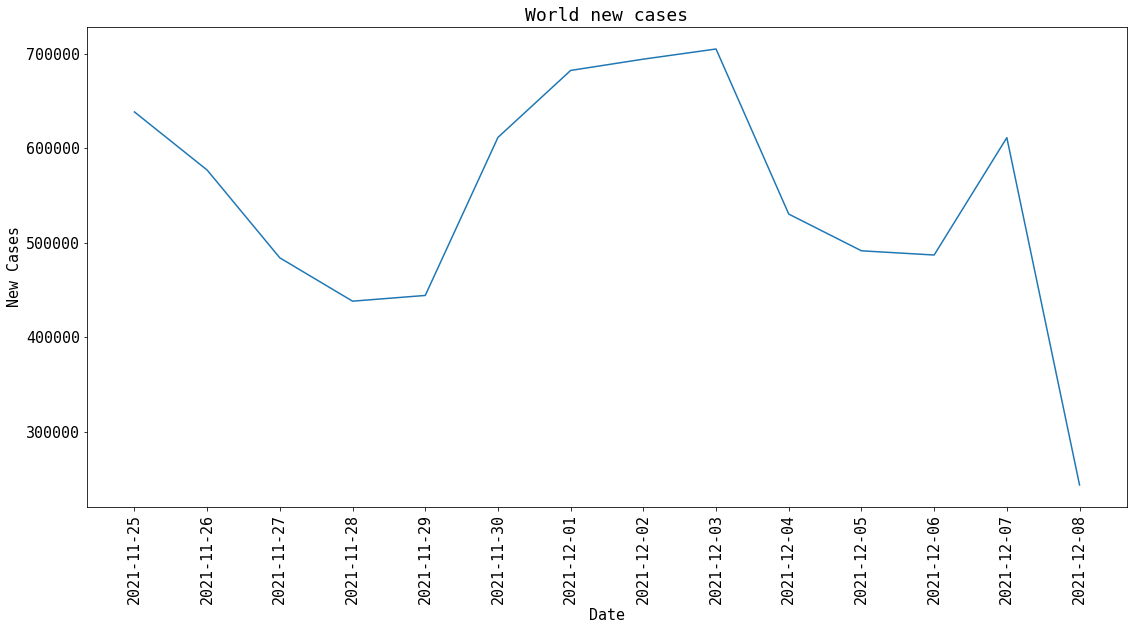

In [7]:
draw_fig(
    [dates,[np.sum(dfs[d]["NewCases"]) for d in dates]],
    'Date',
    'New Cases',
    'World new cases',
    'WorldNewCasesAll',
    'plot'
    )

### 2. New deaths trend

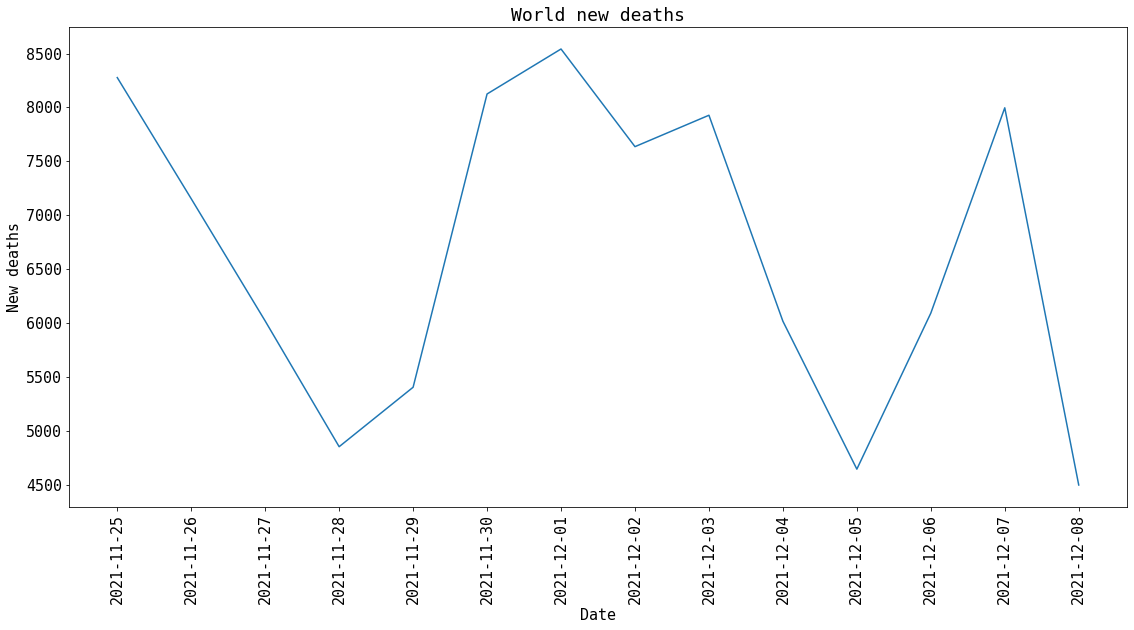

In [8]:
draw_fig(
    [dates,[np.sum(dfs[d]["NewDeaths"]) for d in dates]],
    'Date',
    'New deaths',
    'World new deaths',
    'WorldNewDeathsAll',
    'plot'
    )

### 3. NewDeaths + NewCases trend

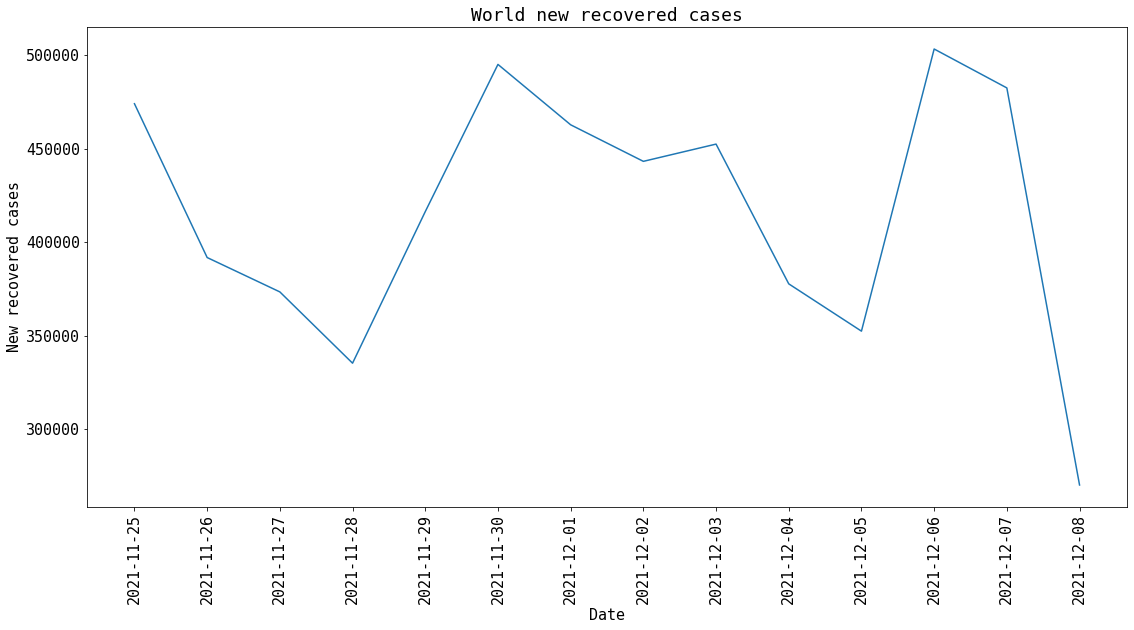

In [9]:
draw_fig(
    [dates,[np.sum(dfs[d]["NewRecovered"]) for d in dates]],
    'Date',
    'New recovered cases',
    'World new recovered cases',
    'WorldNewRecoveredCasesAll',
    'plot'
    )

### 4. Serious cases trend

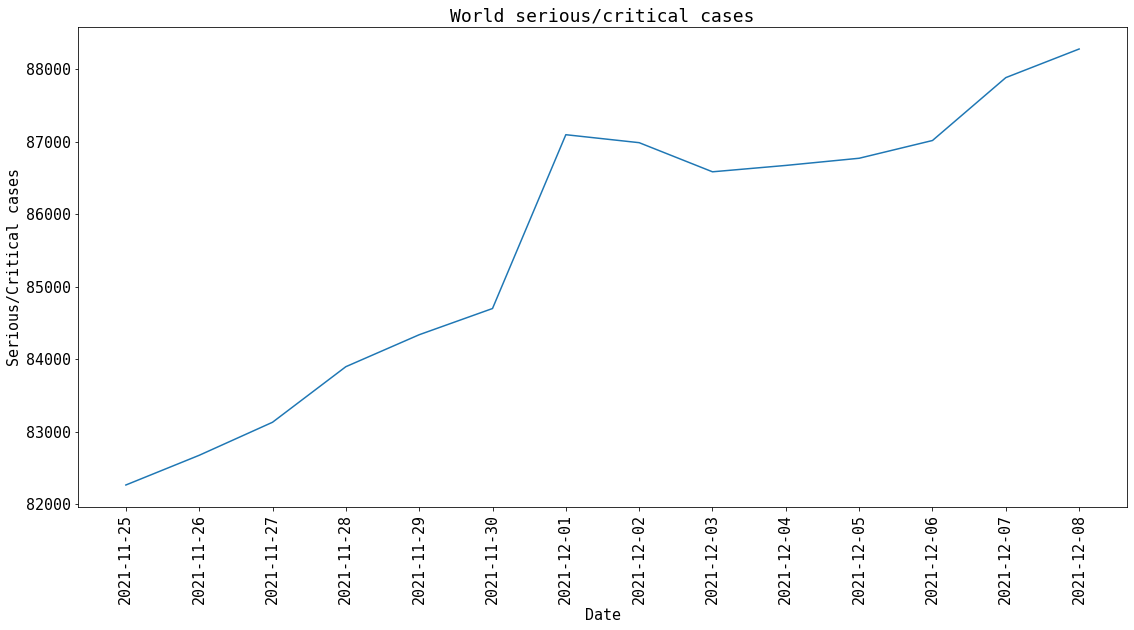

In [10]:
draw_fig(
    [dates,[np.sum(dfs[d]["Serious,Critical"]) for d in dates]],
    'Date',
    'Serious/Critical cases',
    'World serious/critical cases',
    'WorldSerious-CriticalCasesAll',
    'plot'
    )

## Observation on 1 day
* Data is retrieved on the first day of December

In [11]:
date_t = "2021-12-01"
df = dfs[date_t]
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,49584003,131460.0,805134.0,1658.0,39318563.0,81829.0,9460306.0,13343.0,148564.0,2412.0,755685902.0,2264195.0,3.337548e+08,North America
1,India,34606541,9765.0,469724.0,477.0,34028506.0,10207.0,108311.0,8944.0,24732.0,336.0,642412315.0,459117.0,1.399235e+09,Asia
2,Brazil,22105872,11413.0,615020.0,266.0,21339118.0,17487.0,151734.0,8318.0,102961.0,2865.0,63776166.0,297046.0,2.147016e+08,South America
3,UK,10275129,48081.0,145140.0,171.0,9095983.0,33422.0,1034006.0,916.0,150239.0,2122.0,363637864.0,5316990.0,6.839167e+07,Europe
4,Russia,9669718,32837.0,276419.0,1226.0,8364932.0,35679.0,1028367.0,2300.0,66220.0,1893.0,225500000.0,1544275.0,1.460232e+08,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Marshall Islands,4,0.0,0.0,0.0,4.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,5.975600e+04,Australia/Oceania
220,Samoa,3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,2.002830e+05,Australia/Oceania
221,Saint Helena,2,0.0,0.0,0.0,2.0,0.0,0.0,0.0,328.0,0.0,0.0,0.0,6.103000e+03,Africa
222,Micronesia,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,1.167320e+05,Australia/Oceania


In [12]:
df.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
count,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,2.240000e+02,2.240000e+02
mean,1.177409e+06,3046.991071,23402.133929,38.133929,1.054742e+06,2065.723214,8.980669e+04,388.834821,59275.834821,889.843750,1.925177e+07,1.241047e+06,3.511763e+07
std,4.494766e+06,11684.587336,82563.847297,155.728031,3.941860e+06,7631.182722,6.439627e+05,1394.916480,57861.188617,1000.806812,7.463153e+07,2.227253e+06,1.392889e+08
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.357000e+04,2.750000,174.750000,0.000000,7.071250e+03,0.000000,1.992500e+02,0.000000,4649.250000,76.750000,1.776435e+05,6.530850e+04,5.866988e+05
50%,9.959300e+04,74.500000,1570.500000,1.000000,7.807150e+04,35.000000,2.566000e+03,8.000000,48615.000000,552.500000,1.386782e+06,5.023235e+05,5.868350e+06
75%,5.779570e+05,891.750000,11107.500000,11.250000,5.428642e+05,593.250000,2.634250e+04,130.250000,98436.000000,1434.000000,8.707590e+06,1.424794e+06,2.225504e+07
max,4.958400e+07,131460.000000,805134.000000,1658.000000,3.931856e+07,81829.000000,9.460306e+06,13343.000000,250901.000000,5984.000000,7.556859e+08,1.618276e+07,1.439324e+09


### 1. Number of cases per 1 million people

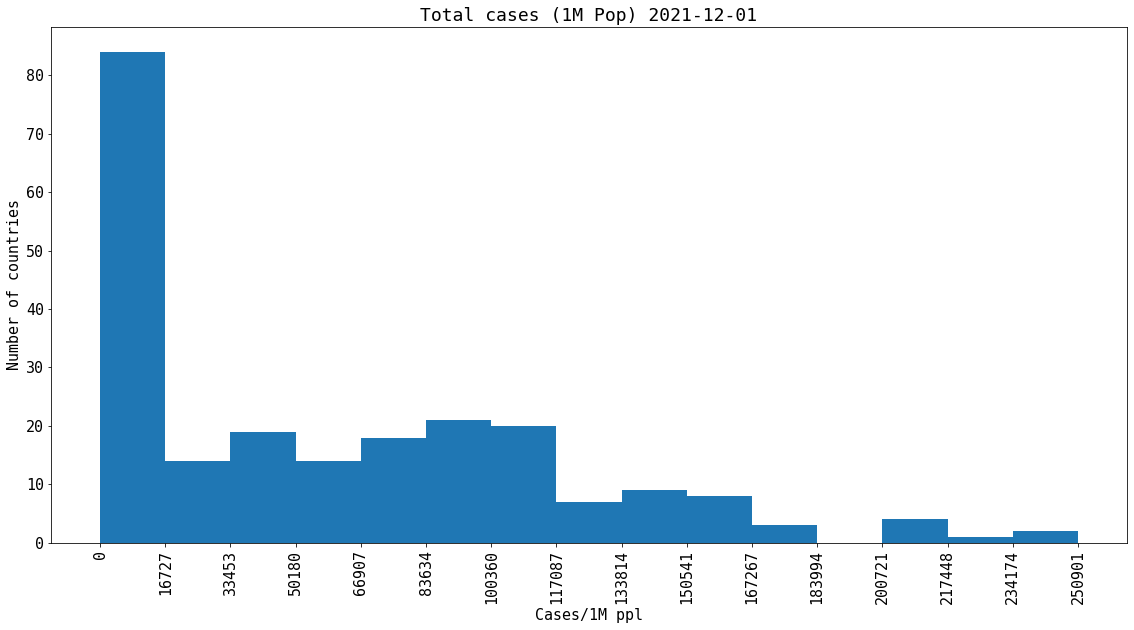

In [13]:
draw_fig(
    df["Tot Cases/1M pop"],
    "Cases/1M ppl",
    "Number of countries",
    f"Total cases (1M Pop) {date_t}",
    f'TotalCases1M-{date_t}',
    'hist')

### 2. Number of test performed per 1 million people

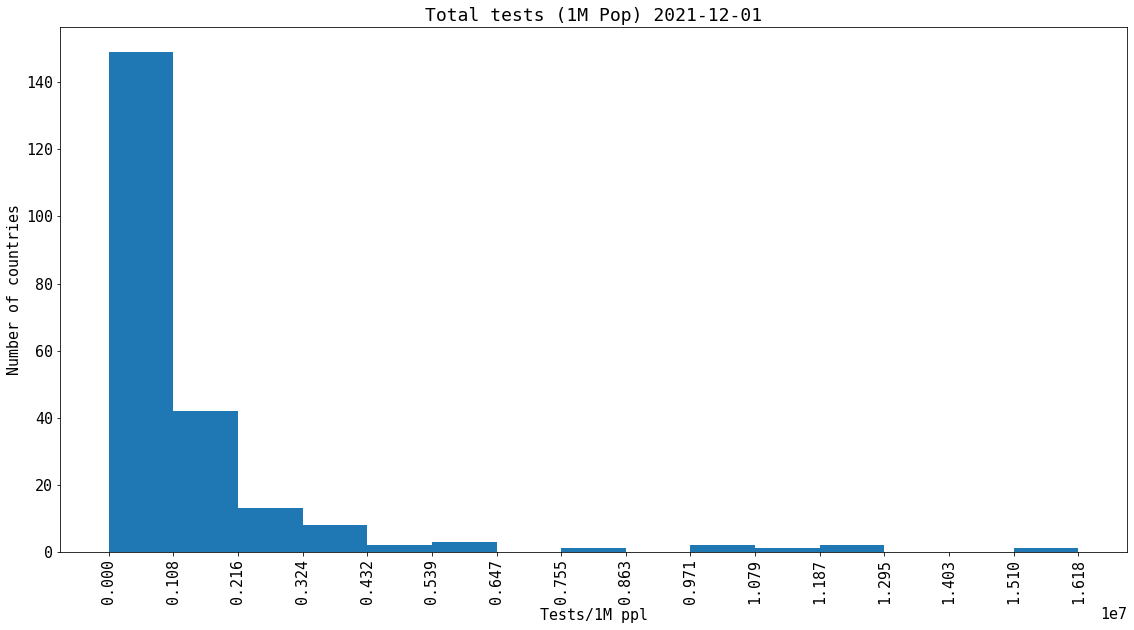

In [14]:
draw_fig(
    df['Tests/1M pop'],
    'Tests/1M ppl',
    'Number of countries', 
    f'Total tests (1M Pop) {date_t}',
    f'TotalTests1M-{date_t}',
    'hist')

### 3. Total recovered cases distribution

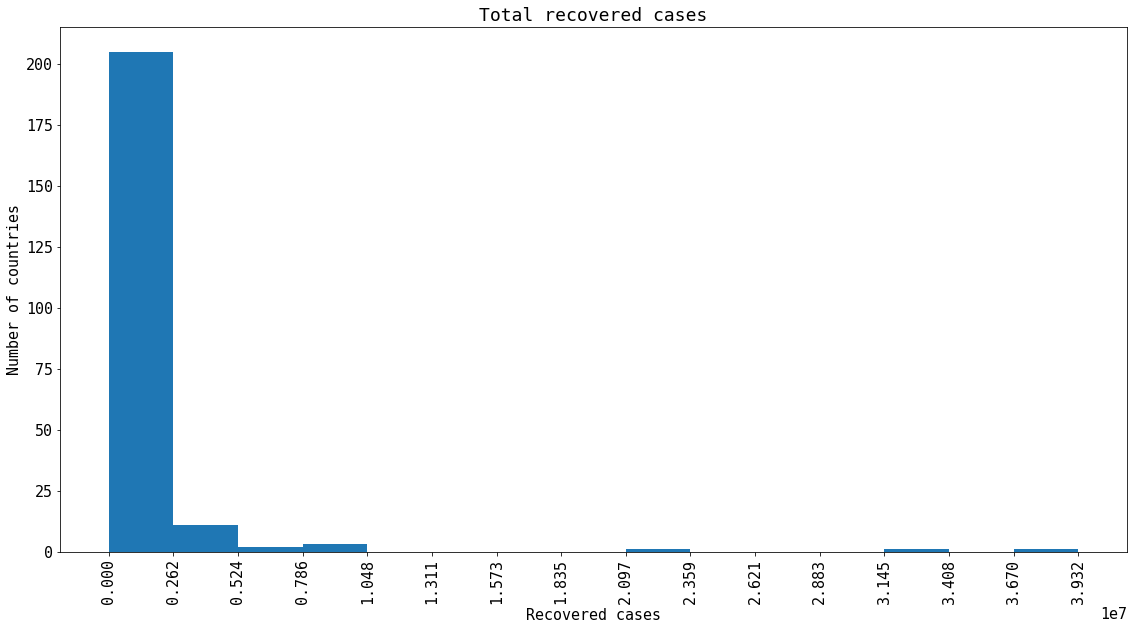

In [15]:
draw_fig(
    df['TotalRecovered'],
    'Recovered cases',
    'Number of countries',
    'Total recovered cases',
    f'TotalRecoveredCases-{date_t}',
    'hist'
    )

### 4. Death cases distribution

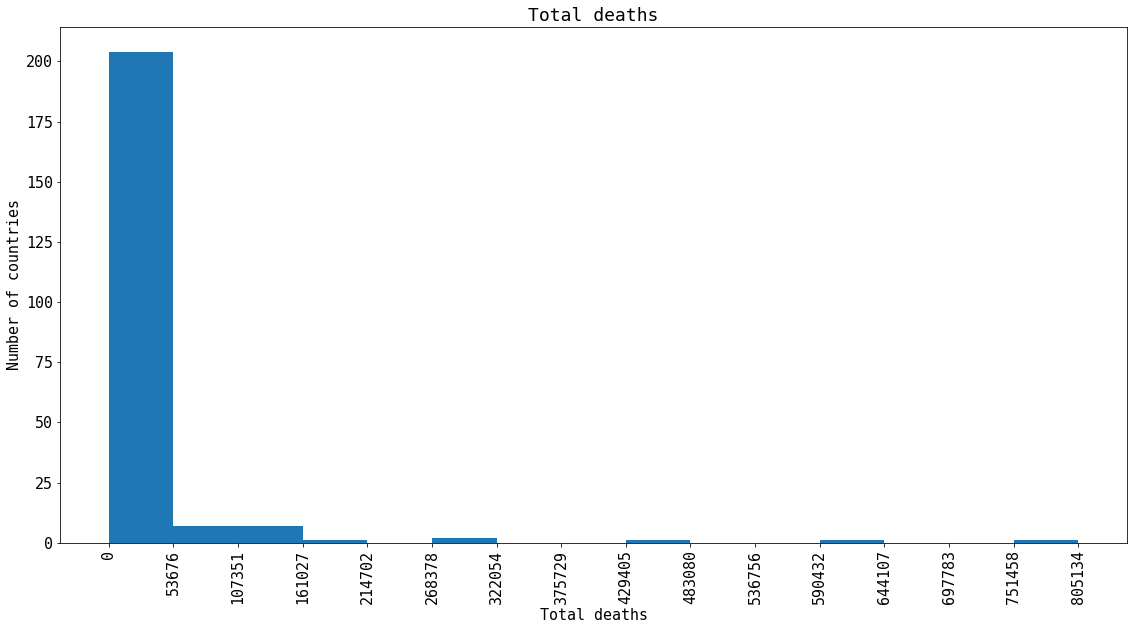

In [16]:
draw_fig(
    df['TotalDeaths'],
    'Total deaths',
    'Number of countries',
    'Total deaths',
    f'TotalDeaths-{date_t}',
    'hist')

### 5. Serious/critical cases distribution

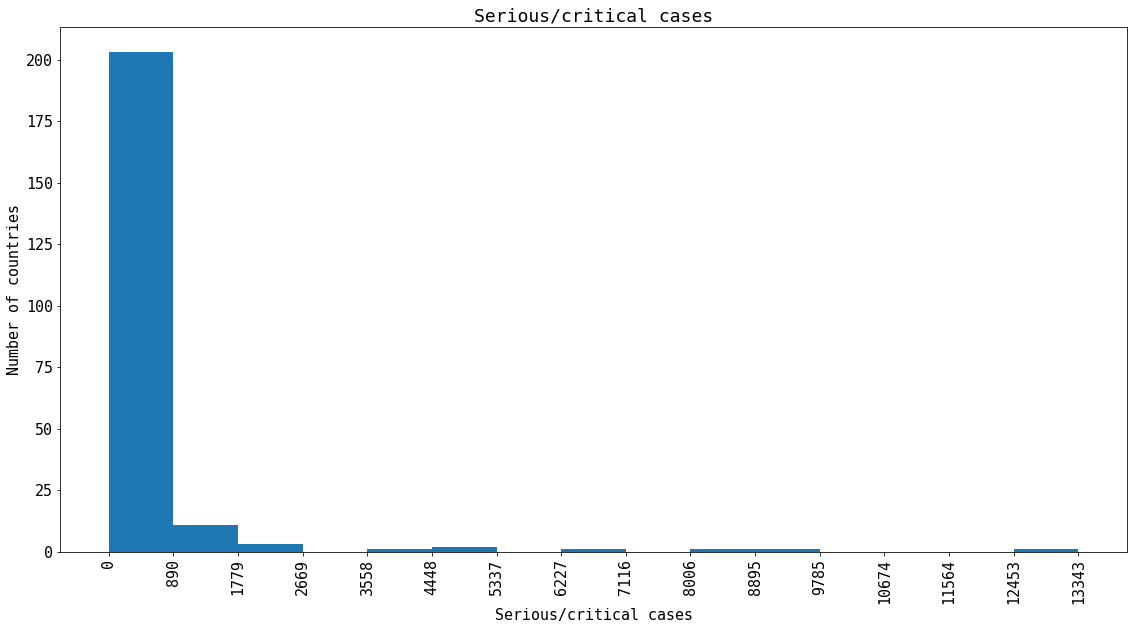

In [17]:
draw_fig(
    df["Serious,Critical"],
    'Serious/critical cases',
    'Number of countries',
    'Serious/critical cases',
    f'Serious-CriticalCases-{date_t}',
    'hist'
)

### 6. Total cases in each continent

In [18]:
continents = df['Continent'].unique()

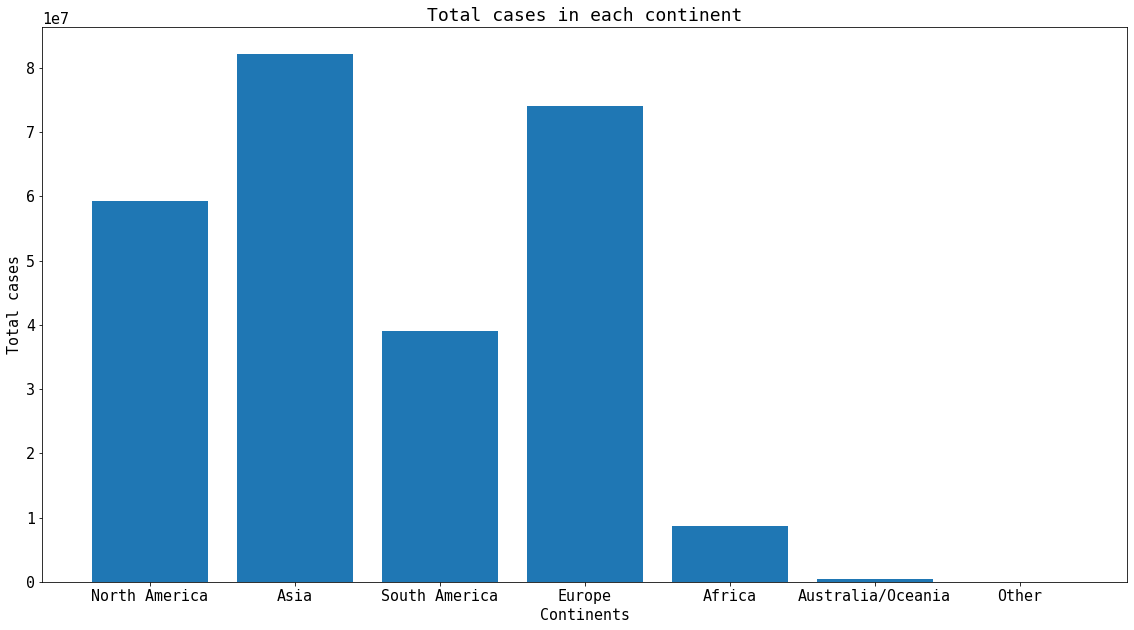

In [19]:
conts_data = [np.sum(df[df['Continent'] == c]['TotalCases']) for c in continents]
draw_fig(
    [continents, conts_data],
    'Continents',
    'Total cases',
    'Total cases in each continent',
    f'TotalCasesEachContienent-{date_t}',
    'bar',
    '0'
)

### 7. Total deaths in each continent

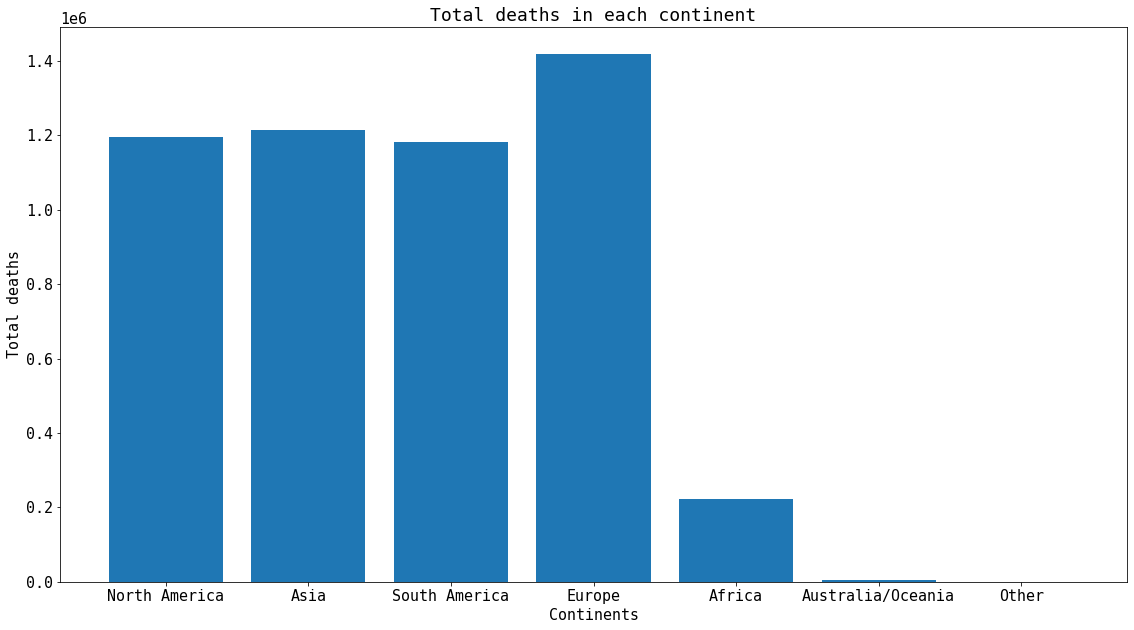

In [20]:
conts_data = [np.sum(df[df['Continent'] == c]['TotalDeaths']) for c in continents]
draw_fig(
    [continents, conts_data],
    'Continents',
    'Total deaths',
    'Total deaths in each continent',
    f'TotalDeathsEachContienent-{date_t}',
    'bar',
    '0'
)

### 8. Number of serious/critical cases in each continent

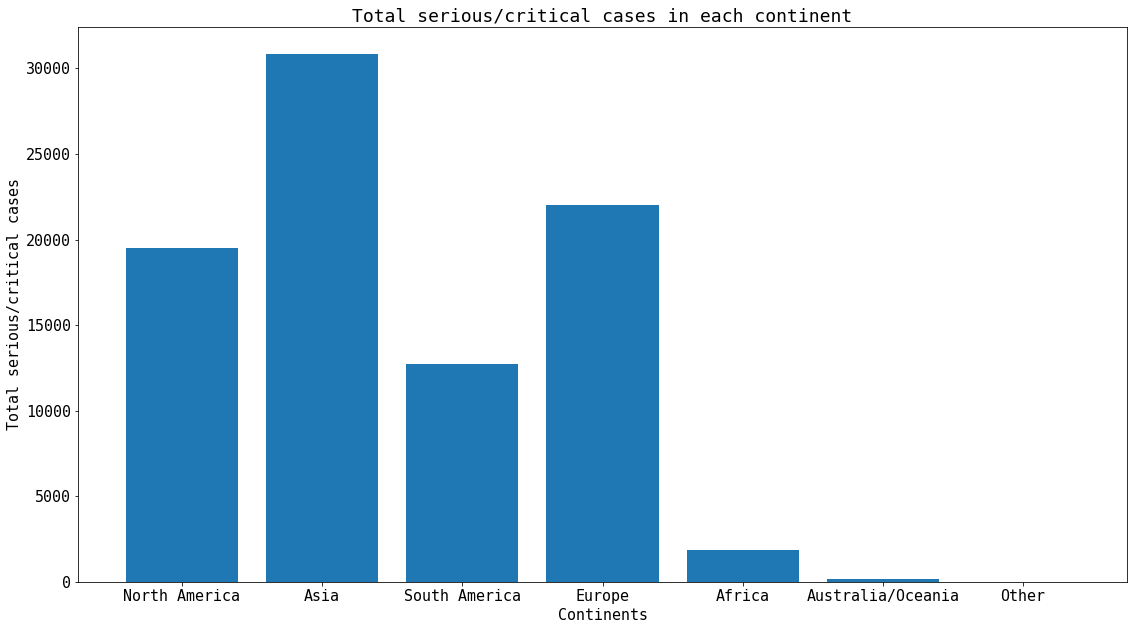

In [21]:
conts_data = [np.sum(df[df['Continent'] == c]['Serious,Critical']) for c in continents]
draw_fig(
    [continents, conts_data],
    'Continents',
    'Total serious/critical cases',
    'Total serious/critical cases in each continent',
    f'Totalserious-criticalEachContienent-{date_t}',
    'bar',
    '0'
)

### 9. Number of recovered cases in each continent

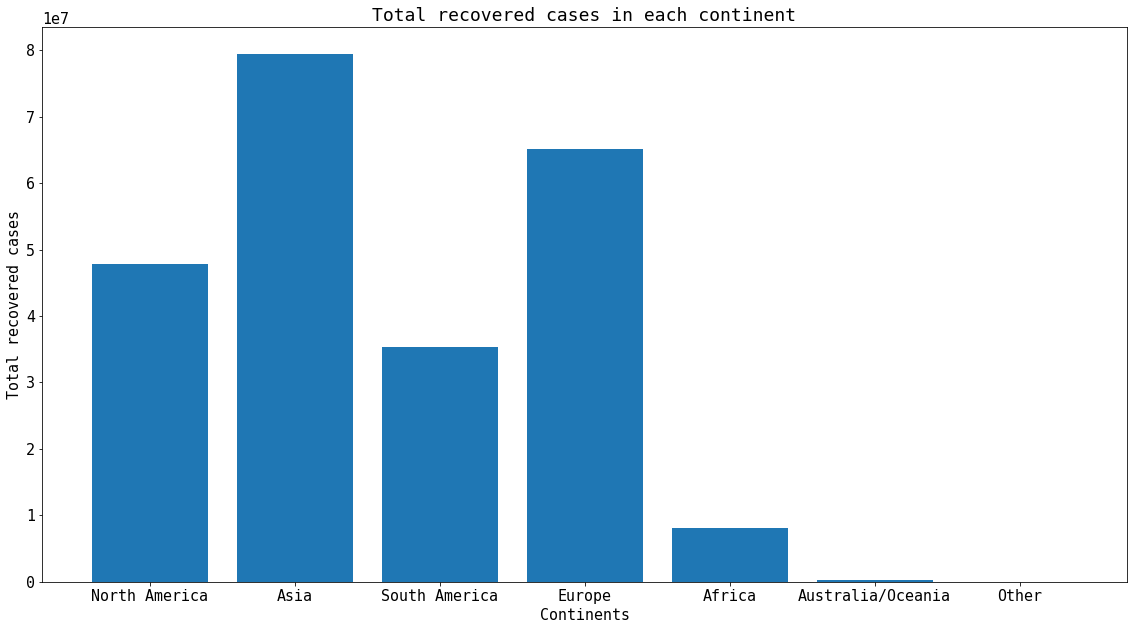

In [22]:
conts_data = [np.sum(df[df['Continent'] == c]['TotalRecovered']) for c in continents]
draw_fig(
    [continents, conts_data],
    'Continents',
    'Total recovered cases',
    'Total recovered cases in each continent',
    f'TotalRecoveredEachContienent-{date_t}',
    'bar',
    '0'
)

### 10. Association between Population and NewCases

In [23]:
# Remove countries where NewCases are nan values
df = dfs_raw[date_t].dropna(subset=['NewCases'])

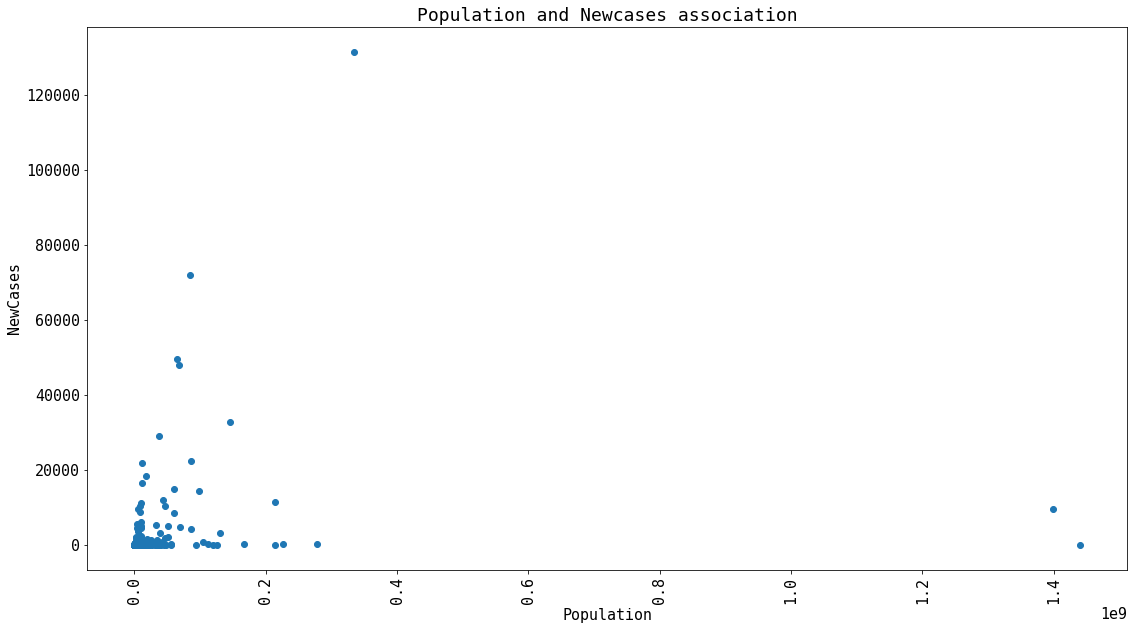

In [24]:
draw_fig(
    [df['Population'],df['NewCases']],
    'Population',
    'NewCases',
    'Population and Newcases association',
    f'Population-NewCases-{date_t}',
    'scatter'
)

### 11. Association between Population and NewDeaths

In [25]:
# Remove countries where NewDeaths are nan values
df = dfs_raw[date_t].dropna(subset=['NewDeaths'])

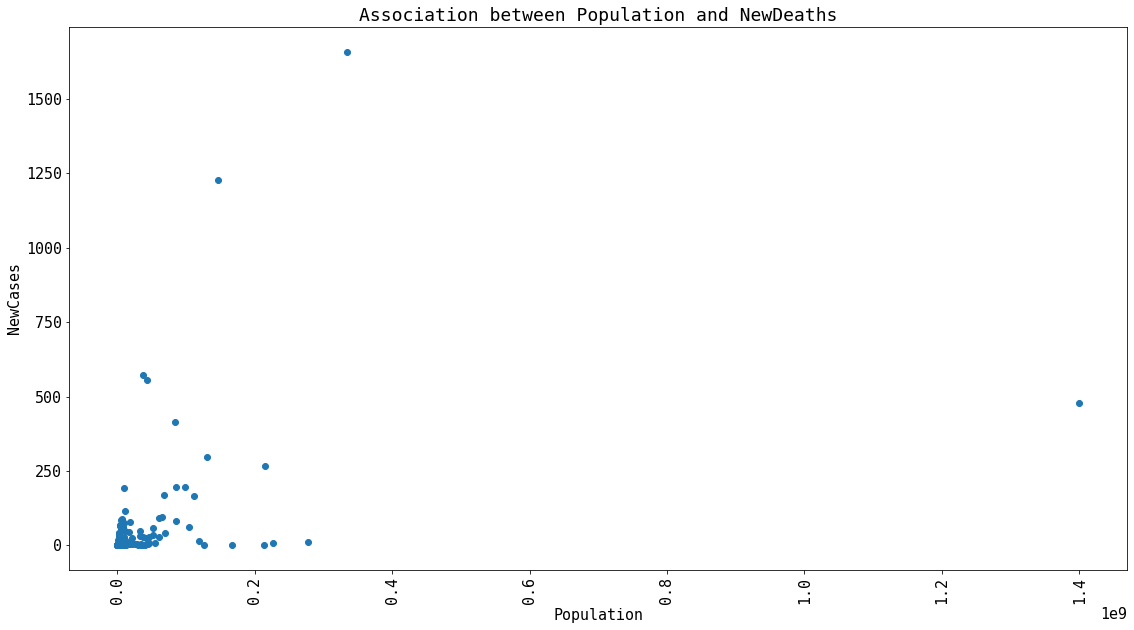

In [26]:
draw_fig(
    [df['Population'],df['NewDeaths']],
    'Population',
    'NewCases',
    'Association between Population and NewDeaths',
    f'Population-NewDeaths-{date_t}',
    'scatter'
)

### 12. Association between TotalTests and TotalCases

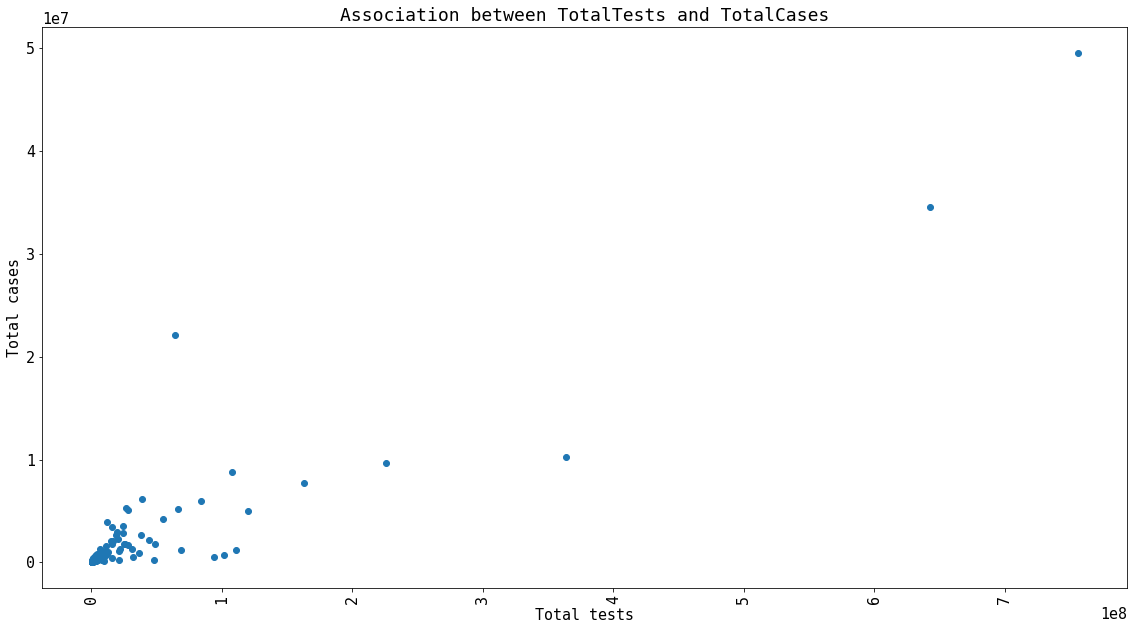

In [27]:
draw_fig(
    [df['TotalTests'],df['TotalCases']],
    'Total tests',
    'Total cases',
    'Association between TotalTests and TotalCases',
    f'TotalTests-TotalCases-{date_t}',
    'scatter'
)

### 13. Association between Serious and TotalCases

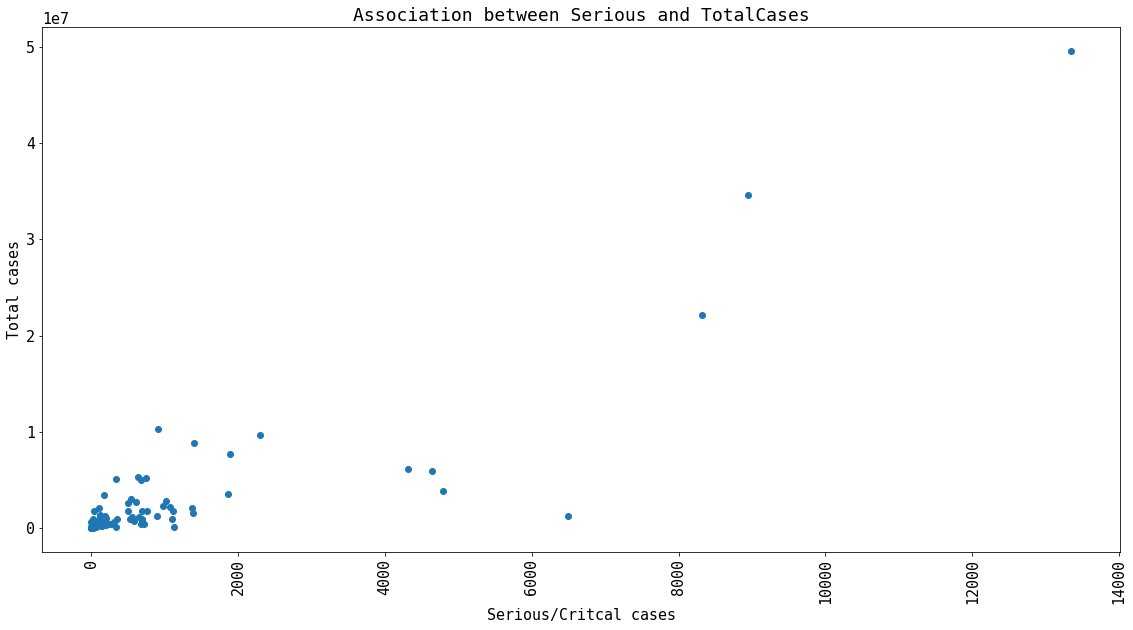

In [28]:
draw_fig(
    [df['Serious,Critical'],df['TotalCases']],
    'Serious/Critcal cases',
    'Total cases',
    'Association between Serious and TotalCases',
    f'Serious-Critical-TotalCases-{date_t}',
    'scatter'
)